In [1]:
using CSV
using DataFrames
using Plots, StatsPlots
using Statistics
using Queryverse
using LaTeXStrings

┌ Info: Precompiling Queryverse [612083be-0b0f-5412-89c1-4e7c75506a58]
└ @ Base loading.jl:1278


In [2]:
theme(:wong2)
gr()

Plots.GRBackend()

In [3]:
dfs = []
for i in 1:50
    try
        df = CSV.File("../insights/animals_original/animals_regmh_0.0_0.0_0.0_$(i).csv", delim="\t") |> DataFrame
        push!(dfs, df)
    catch
        nothing
    end 
end 

df = vcat(dfs...)
df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

m_inner_d = mean(df_[Symbol("Avg node empirical distance")])
m_outter_d =  mean(df_[Symbol("Avg centroid distance")])

13.513873745893239

┌ Warning: ../insights/animals/animals_regmh_0.001_0.001_1.0_30.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_1000.0_0.001_1.0_2.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_0.001_0.01_1.0_15.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_0.001_0.1_1.0_30.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_100.0_0.1_1.0_5.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_0.01_1.0_1.0_3.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_1000.0_1.0_1.0_39.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_1000.0_1.0_1.0_40.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_1.0_100.0_1.0_4.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_1.0_1000.0_1.0_50.csv
└ @ Main In[4]:20
┌ Warning: ../insights/animals/animals_regmh_10.0_1000.0_1.0_4.csv
└ @ Main In[4]:20


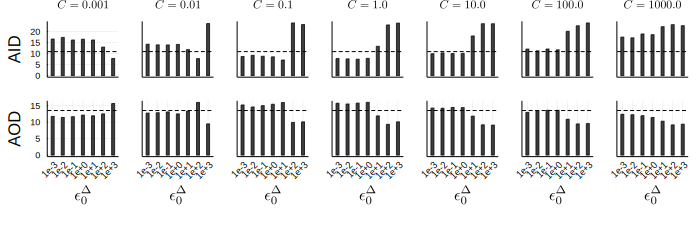

In [4]:
params = ["0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0"]
coverted_params = ["1e-3", "1e-2", "1e-1", "1e+0", "1e+1", "1e+2", "1e+3"]
# coverted_params = map(x -> parse(Float64, x), params)

plts1 = []
plts2 = []
fname = ""
for (i, C) in enumerate(params)
    inner_d = []
    outter_d = []

    for ep in params
        dfs = []
        for i in 1:50
            try
                fname = "../insights/animals/animals_regmh_$(ep)_$(C)_1.0_$i.csv"
                df = CSV.File(fname) |> DataFrame
                push!(dfs, df)
            catch
                @warn(fname)
            end 
        end 

        df = vcat(dfs...)
        df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

        push!(inner_d, mean(df_[Symbol("Avg node empirical distance")]))
        push!(outter_d, mean(df_[Symbol("Avg centroid distance")]))
    end 
    
    if i != 1
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, 
                 xticks=nothing, yticks=nothing, 
                 xrotation=45, alpha=.75, 
                 title=L"C=%$C")
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, xlabel=L"\epsilon_0^\Delta", 
                 xrotation=45, alpha=.75, yticks=nothing, )
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    else 
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, xticks=nothing, 
                 title=L"C=%$C",
                 ylabel="AID",  
                 alpha=.75, 
                 xrotation=45)
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, 
                 xlabel=L"\epsilon_0^\Delta",
                 ylabel="AOD", 
                 alpha=.75, 
                 xrotation=45)
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    end 
    push!(plts1, p1)
    push!(plts2, p2)
end 


extra_p0 = plot(framestyle=:none)
extra_p1 = plot([0], [0], label="BHMC", 
                legendfontsize=10, legend=:top,
                lw=2, ls=:dot, framestyle=:none)
extra_p2 = plot(framestyle=:none)

l = @layout [
        grid(2, 7)  
        b{0.0001h}
    ]
p = plot(vcat(plts1, plts2)..., extra_p2, 
         layout=l, size=(700, 250), link=:y,
         tickfontsize=6, 
         titlefontsize=8,
         labelfontsize=8)



In [5]:
savefig(p, "animals_sens_ep_per_C.pdf")

┌ Warning: ../insights/animals/animals_regmh_0.001_0.001_1.0_30.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_0.001_0.01_1.0_15.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_0.001_0.1_1.0_30.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_0.01_1.0_1.0_3.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_1.0_100.0_1.0_4.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_1.0_1000.0_1.0_50.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_10.0_1000.0_1.0_4.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_100.0_0.1_1.0_5.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_1000.0_0.001_1.0_2.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_1000.0_1.0_1.0_39.csv
└ @ Main In[6]:18
┌ Warning: ../insights/animals/animals_regmh_1000.0_1.0_1.0_40.csv
└ @ Main In[6]:18


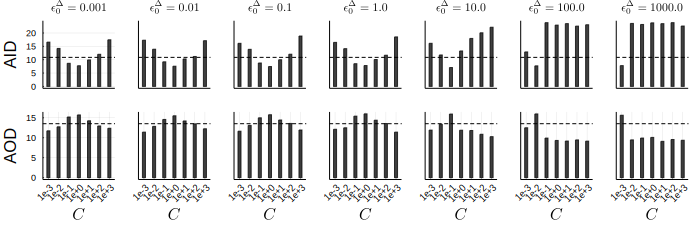

In [6]:
params = ["0.001", "0.01", "0.1", "1.0", "10.0", "100.0", "1000.0"]
coverted_params = ["1e-3", "1e-2", "1e-1", "1e+0", "1e+1", "1e+2", "1e+3"]

plts1 = []
plts2 = []
for (i, ep) in enumerate(params)
    inner_d = []
    outter_d = []

    for C in params
        dfs = []
        for i in 1:50
            try
                fname = "../insights/animals/animals_regmh_$(ep)_$(C)_1.0_$i.csv"
                df = CSV.File(fname) |> DataFrame
                push!(dfs, df)
            catch
                @warn(fname)
            end 
        end 

        df = vcat(dfs...)
        df_ = df[(!).(isnan.(df[!, Symbol("Avg centroid distance")])), :]

        push!(inner_d, mean(df_[Symbol("Avg node empirical distance")]))
        push!(outter_d, mean(df_[Symbol("Avg centroid distance")]))
    end 

    if i != 1
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, 
                 xticks=nothing, yticks=nothing, 
                 xrotation=45, alpha=.75, 
                 title=L"\epsilon_0^\Delta=%$ep")
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, xlabel=L"C", 
                 xrotation=45, alpha=.75, yticks=nothing, )
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    else 
        p1 = bar(coverted_params, inner_d, legend=false, bar_width=0.3, xticks=nothing, 
                 title=L"\epsilon_0^\Delta=%$ep", 
                 ylabel="AID",  
                 alpha=.75, 
                 xrotation=45)
        hline!([m_inner_d], color="black", linestyle=:dash, lw=1)
        p2 = bar(coverted_params, outter_d, legend=false, bar_width=0.3, 
                 xlabel=L"C",  
                 ylabel="AOD", 
                 alpha=.75, 
                 xrotation=45)
        hline!([m_outter_d], color="black", linestyle=:dash, lw=1)
    end 
    push!(plts1, p1)
    push!(plts2, p2)
end 

extra_p0 = plot(framestyle=:none)
extra_p1 = plot([0], [0], label="BHMC", 
                legendfontsize=10, legend=:top,
                lw=2, ls=:dot, framestyle=:none)
extra_p2 = plot(framestyle=:none)

l = @layout [
        grid(2, 7)  
        b{0.0001h}
    ]
p = plot(vcat(plts1, plts2)..., extra_p2, 
         layout=l, size=(700, 250), link=:y,
         tickfontsize=6, 
         titlefontsize=8,
         labelfontsize=8)



In [7]:
savefig(p, "animals_sens_C_per_ep.pdf")